In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import flare_prob

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [31]:
dur = 0.05 # duration to simulate (in years)

ffd_alpha = 0 # the log flare frequency amplitude (turn this knob to increase/decrease total flare rate)
ffd_beta = -1.0 # ffd slope

ffd_min = -1 # how far down in the log(Equiv-Dur) FFD to model
dt = 0.1/24./60. # do 0.1-min cadence

s_time1, s_flux1 = flare_prob.SuperLC(dur=dur, mag=False, ffd_alpha=0.5, ffd_beta=-1, 
                                      ffd_min=-2, dt=dt)

s_time2, s_flux2 = flare_prob.SuperLC(dur=dur, mag=False, ffd_alpha=0, ffd_beta=-2, 
                                      ffd_min=-1.5, dt=dt)

Making 262800 epochs
Simulating 5767 flares
Making 262800 epochs
Simulating 18250 flares


In [32]:
dfout1 = pd.DataFrame(data={'time':s_time1, 'flux':s_flux1})
dfout1.to_csv('lc1.csv')

dfout2 = pd.DataFrame(data={'time':s_time2, 'flux':s_flux2})
dfout2.to_csv('lc2.csv')

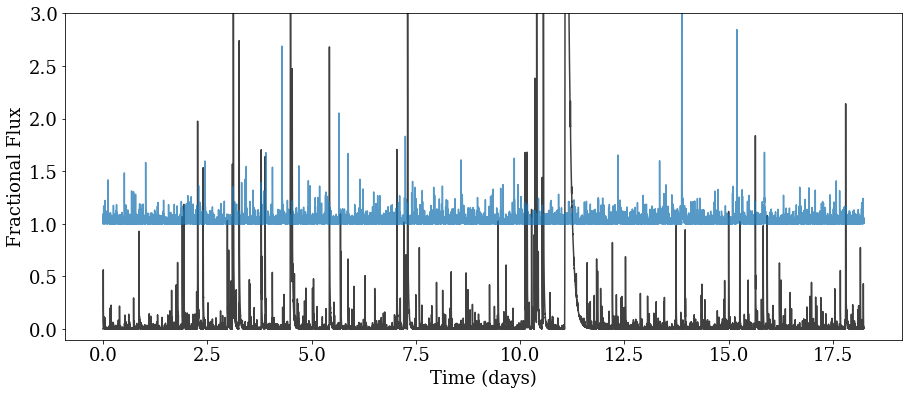

In [35]:
plt.figure(figsize=(15,6))
plt.plot(s_time1, s_flux1, alpha=0.75, c='black')
plt.plot(s_time2, s_flux2 + 1, alpha=0.75)

plt.ylim(-0.1,3)
plt.xlabel('Time (days)')
plt.ylabel('Fractional Flux')
plt.savefig('Fakeflares_try1.png', dpi=150, rasterized=True, bbox_inches='tight', pad_inches=0.5)

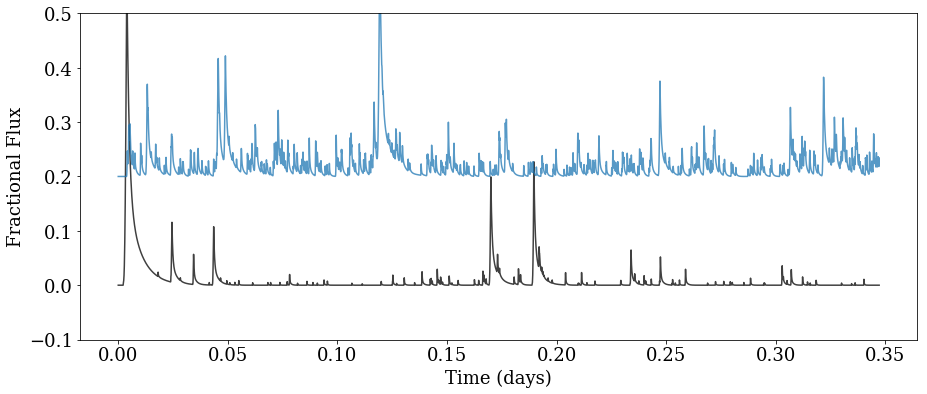

In [36]:
plt.figure(figsize=(15,6))
plt.plot(s_time1[0:5000], s_flux1[0:5000], alpha=0.75, c='black')
plt.plot(s_time2[0:5000], s_flux2[0:5000]+0.2, alpha=0.75)
plt.ylim(-0.1,.5)
plt.xlabel('Time (days)')
plt.ylabel('Fractional Flux')

(0, 0.5)

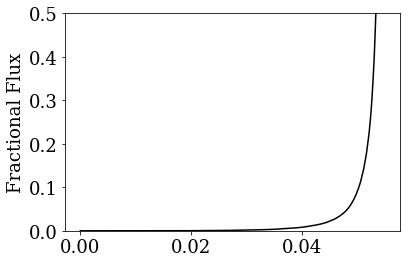

In [100]:
plt.plot(np.linspace(0,1,len(s_time1)) / max(s_time1), s_flux1[np.argsort(s_flux1)], c='black')
# plt.plot(np.linspace(0,1,len(s_time2)), s_flux1[np.argsort(s_flux2)])
plt.ylabel('Fractional Flux')
plt.ylim(0,0.5)

In [27]:
from astropy.stats import lombscargle, LombScargle

In [37]:
frequency1, power1 = LombScargle(s_time1, s_flux1).autopower()
frequency2, power2 = LombScargle(s_time2, s_flux2).autopower()

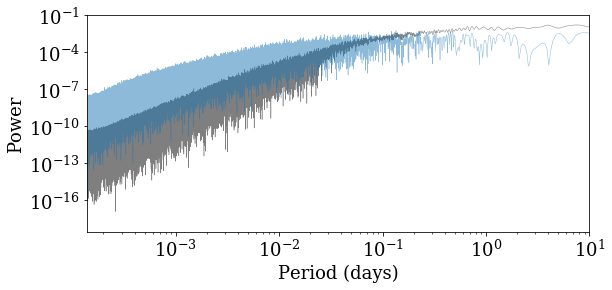

In [39]:
plt.figure(figsize=(9,4))
plt.plot(1./frequency1, power1, lw=0.5, c='black', alpha=0.5)
plt.plot(1./frequency2, power2, lw=0.5, alpha=0.5)

plt.xscale('log')
plt.xlabel('Period (days)')
plt.ylabel('Power')
plt.yscale('log')
plt.xlim(dt*2, 10);

# An experiment in the powerspectrum

[-2.5 -2.  -1. ]
[-1.25 -1.5  -2.  ]
Making 26280 epochs
Simulating 24327 flares
Making 26280 epochs
Simulating 18250 flares
Making 26280 epochs
Simulating 1825 flares


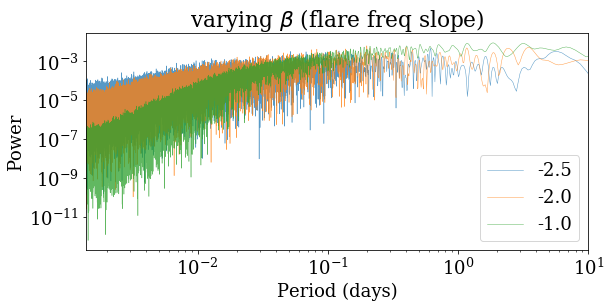

In [109]:
beta_i = np.array([-2.5, -2, -1])
print(beta_i)
min_i = -2.5 - beta_i/2.
print(min_i)

plt.figure(figsize=(9,4))
for k in range(len(beta_i)):
    s_timei, s_fluxi = flare_prob.SuperLC(dur=dur, mag=False, ffd_alpha=0, ffd_beta=beta_i[k],
                                          ffd_min=min_i[k], dt=dt*10)
    frequencyi, poweri = LombScargle(s_timei, s_fluxi).autopower()

    plt.plot(1./frequencyi, poweri, lw=0.5, alpha=0.75, label=str(beta_i[k]))

plt.legend()
plt.xscale('log')
plt.xlabel('Period (days)')
plt.ylabel('Power')
plt.yscale('log')
plt.title(r'varying $\beta$ (flare freq slope)')
plt.xlim(dt*2*10, 10);

[-1.   0.   0.5]
Making 26280 epochs
Simulating 565 flares
Making 26280 epochs
Simulating 5767 flares
Making 26280 epochs
Simulating 18250 flares


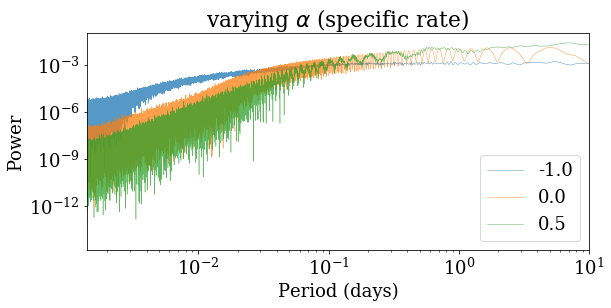

In [110]:
alpha_i = np.array([-1, 0, 0.5])
print(alpha_i)

plt.figure(figsize=(9,4))
for k in range(len(alpha_i)):
    s_timei, s_fluxi = flare_prob.SuperLC(dur=dur, mag=False, ffd_alpha=alpha_i[k], ffd_beta=-1,
                                          ffd_min=-2.5, dt=dt*10)
    frequencyi, poweri = LombScargle(s_timei, s_fluxi).autopower()

    plt.plot(1./frequencyi, poweri, lw=0.5, alpha=0.75, label=str(alpha_i[k]))

plt.legend()
plt.xscale('log')
plt.xlabel('Period (days)')
plt.ylabel('Power')
plt.yscale('log')
plt.title(r'varying $\alpha$ (specific rate)')
plt.xlim(dt*2*10, 10);

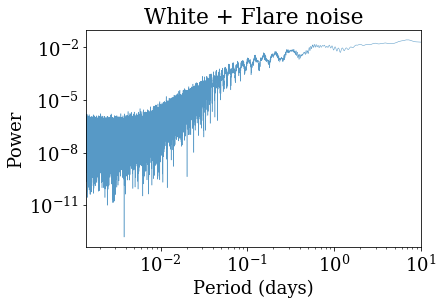

In [118]:
frequencyi, poweri = LombScargle(s_timei, s_fluxi  + np.random.randn(len(s_fluxi))*0.1).autopower()

plt.plot(1./frequencyi, poweri, lw=0.5, alpha=0.75, label=str(alpha_i[k]))

# plt.legend()
plt.xscale('log')
plt.xlabel('Period (days)')
plt.ylabel('Power')
plt.yscale('log')
plt.title('White + Flare noise')
plt.xlim(dt*2*10, 10);

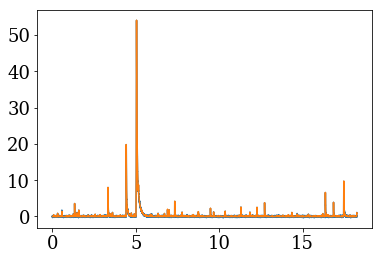

In [119]:
plt.plot(s_timei, s_fluxi + np.random.randn(len(s_fluxi))*0.1)
plt.plot(s_timei, s_fluxi)